# EDA AQI Data and 2020 Mobility Data

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#By County
BAC_Mobility = pd.read_csv('Data/BA_County_Mobility_2020.csv')
BAC_Mobility['DATE'] = pd.to_datetime(BAC_Mobility['DATE'])
BAC_Mobility.head(10)

,COUNTY,DATE,RETAIL/RECREATION,GROCERY/PHARMACY,PARKS,TRANSIT/STATIONS,WORKPLACES,RESIDENTIAL
0,Alameda,2020-02-15,1.0,0.0,22.0,1.0,0.0,-1.0
1,Alameda,2020-02-16,7.0,0.0,24.0,5.0,1.0,-2.0
2,Alameda,2020-02-17,13.0,1.0,55.0,-31.0,-53.0,11.0
3,Alameda,2020-02-18,-2.0,3.0,21.0,3.0,0.0,0.0
4,Alameda,2020-02-19,-1.0,0.0,14.0,1.0,0.0,0.0
5,Alameda,2020-02-20,1.0,1.0,13.0,2.0,0.0,0.0
6,Alameda,2020-02-21,1.0,1.0,8.0,-1.0,3.0,0.0
7,Alameda,2020-02-22,1.0,3.0,18.0,-2.0,4.0,-1.0
8,Alameda,2020-02-23,4.0,4.0,26.0,15.0,3.0,-1.0
9,Alameda,2020-02-24,0.0,0.0,9.0,0.0,4.0,0.0


In [53]:
#For the Bay Area as a Whole
BA_Mobility = pd.read_csv('Data/BA_MOB_SUMMARY.csv')
BA_Mobility['DATE'] = pd.to_datetime(BA_Mobility['DATE'])
BA_Mobility.index = BA_Mobility['DATE']
BA_Mobility.head(10)

,RETAIL/RECREATION,GROCERY/PHARMACY,TRANSIT/STATIONS,WORKPLACES,PARKS,RESIDENTIAL,DATE
DATE,,,,,,,
2020-02-15,1.2,0.3,1.8,-0.8,23.4,-1.0,2020-02-15
2020-02-16,5.3,0.0,4.0,-0.3,31.0,-1.9,2020-02-16
2020-02-17,12.1,3.2,-23.2,-52.6,66.5,10.6,2020-02-17
2020-02-18,-1.1,0.9,2.8,-2.9,21.8,0.2,2020-02-18
2020-02-19,-0.9,-0.9,-0.6,-2.4,13.4,0.4,2020-02-19
2020-02-20,0.8,0.1,0.8,-2.8,17.3,0.2,2020-02-20
2020-02-21,-0.4,-0.6,-1.6,-1.2,11.0,0.5,2020-02-21
2020-02-22,0.4,1.9,-1.4,2.7,22.7,-0.9,2020-02-22
2020-02-23,3.5,3.7,5.2,3.2,27.7,-0.9,2020-02-23


In [38]:
BA_AQI_all = pd.read_csv('Data/BA_AQI_SUMMARY.csv')
BA_AQI_all['DATE'] = pd.to_datetime(BA_AQI_all['DATE'])
BA_AQI_all.index = BA_AQI_all['DATE']
BA_AQI_all.head(10)

,AREA_AVE_PM_2.5,AREA_24hr_AQI,AREA_AQI_LEVEL,AREA_GOOD,AREA_MOD,AREA_UHSG,AREA_UH,AREA_VUH,AREA_HAZ,AREA_GOOD_MAX,...,POP_GOOD_MAX,POP_MOD_MAX,POP_UHSG_MAX,POP_UH_MAX,POP_VUH_MAX,POP_HAZ_MAX,MAX_PM_2.5,Max_AQI,AQI_LEVEL_MAX,DATE
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01,21.572190,71,2,0.075346,0.924654,0,0.000000,0.0,0.0,0.071026,...,0.006689,0.260327,0,0.478674,0.254310,0.0,76.0,162,4,2015-01-01
2015-01-02,23.234700,74,2,0.053861,0.902882,0,0.043257,0.0,0.0,0.000000,...,0.000000,0.674547,0,0.268862,0.056591,0.0,67.0,157,4,2015-01-02
2015-01-03,25.692225,80,2,0.053861,0.903650,0,0.042489,0.0,0.0,0.000000,...,0.000000,0.210978,0,0.421876,0.367146,0.0,75.0,161,4,2015-01-03
2015-01-04,26.071521,80,2,0.053861,0.946139,0,0.000000,0.0,0.0,0.000000,...,0.000000,0.061115,0,0.879553,0.059332,0.0,71.0,159,4,2015-01-04
2015-01-05,23.524081,75,2,0.071026,0.913337,0,0.015636,0.0,0.0,0.017165,...,0.000084,0.496866,0,0.384723,0.118326,0.0,66.0,156,4,2015-01-05
2015-01-06,21.109008,70,2,0.111207,0.882551,0,0.006242,0.0,0.0,0.040181,...,0.001738,0.280627,0,0.402321,0.315313,0.0,55.0,223,5,2015-01-06
2015-01-07,18.079864,64,2,0.183736,0.800628,0,0.015636,0.0,0.0,0.000000,...,0.000000,0.624852,0,0.373670,0.001478,0.0,64.0,155,4,2015-01-07
2015-01-08,22.841598,74,2,0.143564,0.803385,0,0.053051,0.0,0.0,0.053861,...,0.006605,0.035344,0,0.507214,0.450838,0.0,71.0,159,4,2015-01-08
2015-01-09,19.947318,68,2,0.143564,0.840800,0,0.015636,0.0,0.0,0.053861,...,0.006605,0.304050,0,0.503059,0.186286,0.0,77.0,162,4,2015-01-09


In [16]:
BA_AQI_all.columns

Index(['DATE', 'AREA_AVE_PM_2.5', 'AREA_24hr_AQI', 'AREA_AQI_LEVEL',
       'AREA_GOOD', 'AREA_MOD', 'AREA_UHSG', 'AREA_UH', 'AREA_VUH', 'AREA_HAZ',
       'AREA_GOOD_MAX', 'AREA_MOD_MAX', 'AREA_UHSG_MAX', 'AREA_UH_MAX',
       'AREA_VUH_MAX', 'AREA_HAZ_MAX', 'POP_AVE_PM_2.5', 'POP_24hr_AQI',
       'POP_AQI_LEVEL', 'POP_GOOD', 'POP_MOD', 'POP_UHSG', 'POP_UH', 'POP_VUH',
       'POP_HAZ', 'POP_GOOD_MAX', 'POP_MOD_MAX', 'POP_UHSG_MAX', 'POP_UH_MAX',
       'POP_VUH_MAX', 'POP_HAZ_MAX', 'MAX_PM_2.5', 'Max_AQI', 'AQI_LEVEL_MAX'],
      dtype='object')

In [5]:
with open('Data/BA_AQI_COUNTIES.json') as f:
    BA_COUNTIES  = json.load(f)

BA_COUNTIES.keys()

dict_keys(['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma'])

Average and maximum PM 2.5 for the bay area throughout the 2015-2020

The last recorded data was on 2020-12-03 00:00:00


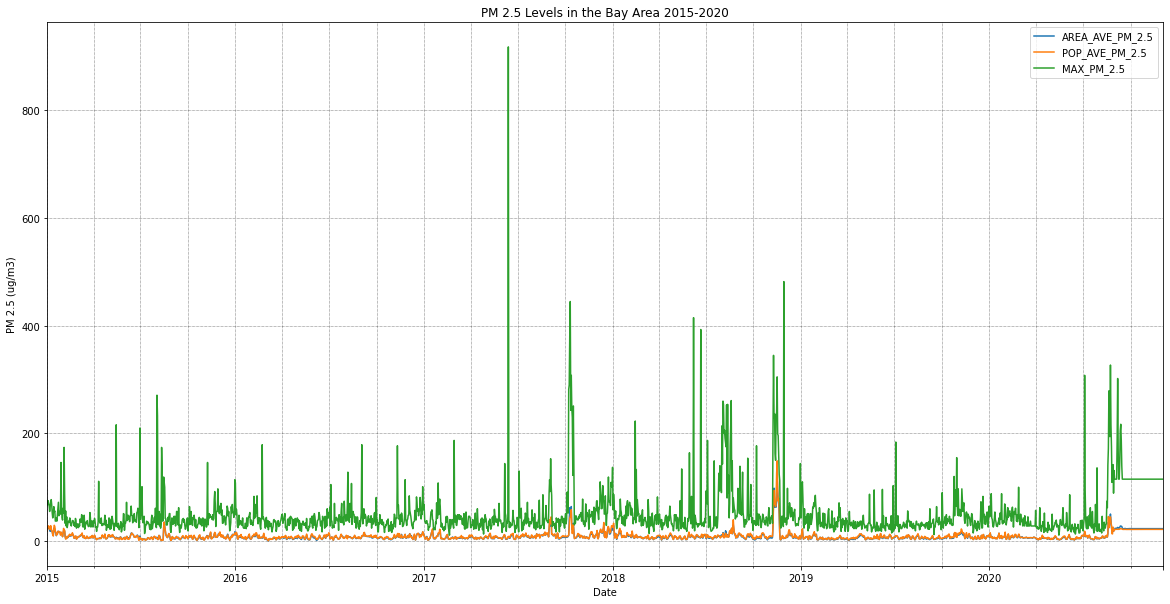

In [46]:
ax = BA_AQI_all.plot(y = ['AREA_AVE_PM_2.5','POP_AVE_PM_2.5','MAX_PM_2.5'],title='PM 2.5 Levels in the Bay Area 2015-2020',figsize=(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("PM 2.5 (ug/m3)")
#ax.set_ylim((0,15000)) 
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print('The last recorded data was on %s' % max(list(BA_AQI_all['DATE'])))

Checking for seasonality:

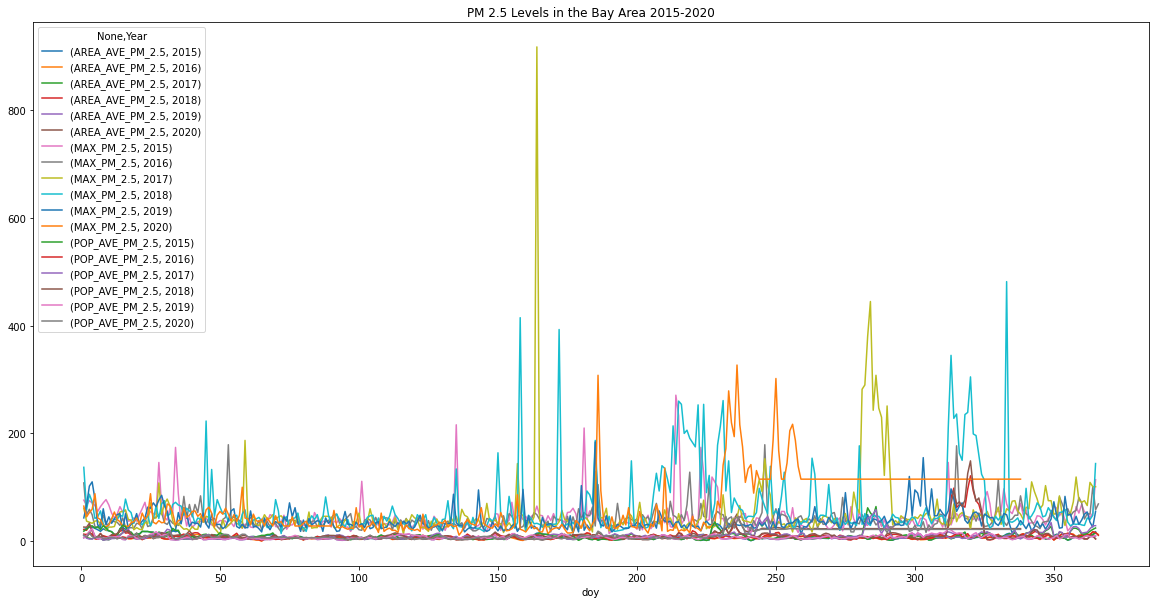

In [48]:
BA_AQI_all['doy'] = BA_AQI_all.index.dayofyear
BA_AQI_all['Month - Day'] = BA_AQI_all.index.month.astype(str) +'-' + BA_AQI_all.index.day.astype(str)
BA_AQI_all['Year'] = BA_AQI_all.index.year
piv = pd.pivot_table(BA_AQI_all, index=['doy'],columns=['Year'], values=['AREA_AVE_PM_2.5','POP_AVE_PM_2.5','MAX_PM_2.5'])
ax = piv.plot(title='PM 2.5 Levels in the Bay Area 2015-2020',figsize=(20, 10))

#BA_AQI_all['DAY']

We can see in the plot above that the biggest spikes correspond to the fire season, which occurs in the second half of the year. Additionally, there seems to be no discernable difference between the average weighted by area with the average weighted by population density.

The last recorded data was on 2020-12-03 00:00:00


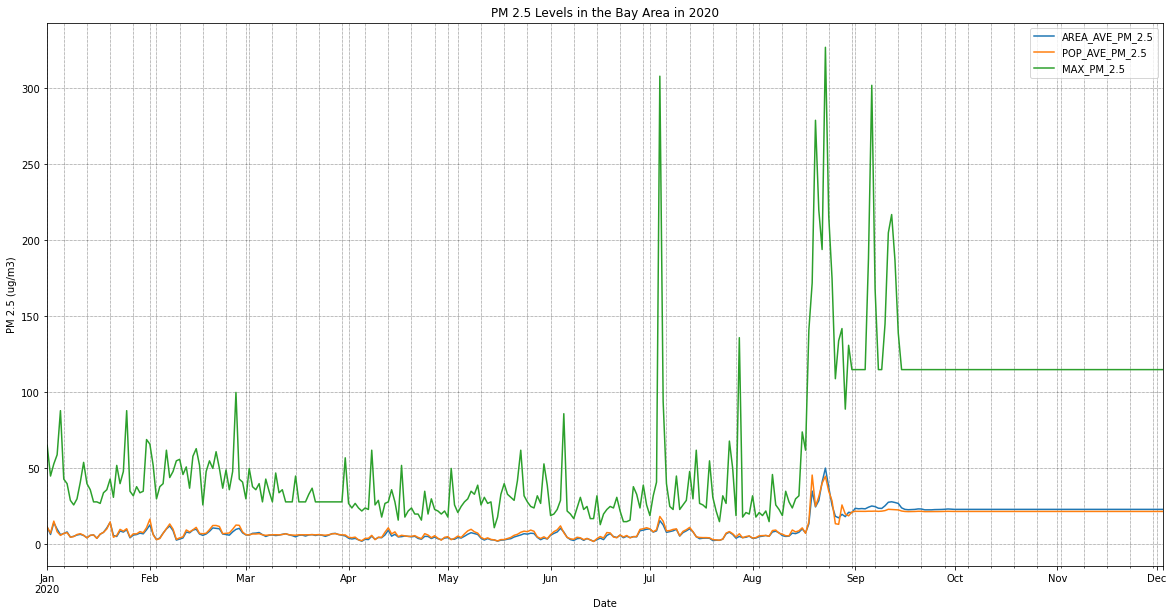

In [50]:
ax = BA_AQI_all['2020'].plot(y = ['AREA_AVE_PM_2.5','POP_AVE_PM_2.5','MAX_PM_2.5'],title='PM 2.5 Levels in the Bay Area in 2020',figsize=(20,10))
ax.set_xlabel("Date")
ax.set_ylabel("PM 2.5 (ug/m3)")
#ax.set_ylim((0,15000)) 
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print('The last recorded data was on %s' % max(list(BA_AQI_all['DATE'])))

It also seems there might be an error in the data starting in mid-September that merits some data exploration and possibly cleaning

In [55]:
max_date_mob = BA_Mobility.index.max()
min_date_mob = BA_Mobility.index.min()
BA_AQI_2020 = BA_AQI_all[min_date_mob:max_date_mob]
#BA_AQI_2020.tail(10)

,AREA_AVE_PM_2.5,AREA_24hr_AQI,AREA_AQI_LEVEL,AREA_GOOD,AREA_MOD,AREA_UHSG,AREA_UH,AREA_VUH,AREA_HAZ,AREA_GOOD_MAX,...,POP_VUH_MAX,POP_HAZ_MAX,MAX_PM_2.5,Max_AQI,AQI_LEVEL_MAX,DATE,doy,Day - Month,Year,Month - Day
DATE,,,,,,,,,,,,,,,,,,,,,
2020-11-24,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-11-24,329,11-24,2020,11-24
2020-11-25,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-11-25,330,11-25,2020,11-25
2020-11-26,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-11-26,331,11-26,2020,11-26
2020-11-27,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-11-27,332,11-27,2020,11-27
2020-11-28,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-11-28,333,11-28,2020,11-28
2020-11-29,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-11-29,334,11-29,2020,11-29
2020-11-30,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-11-30,335,11-30,2020,11-30
2020-12-01,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-12-01,336,12-1,2020,12-1
2020-12-02,23.071636,74,2,0.116857,0.883143,0,0.0,0.0,0.0,0.0,...,0.108098,0.0,115.0,182,4,2020-12-02,337,12-2,2020,12-2


In [ ]:
BA_AQI_2020